# My friend likes to bike ðŸš´
> Building interactive webapp with Python, Bootstrap and Flask

- toc: true 
- badges: true
- comments: true
- author: Jaekang Lee
- image: images/janna.jpg
- categories: [python, jupyter, CRISP-DM, bootstrap, plotly, flask, pca]

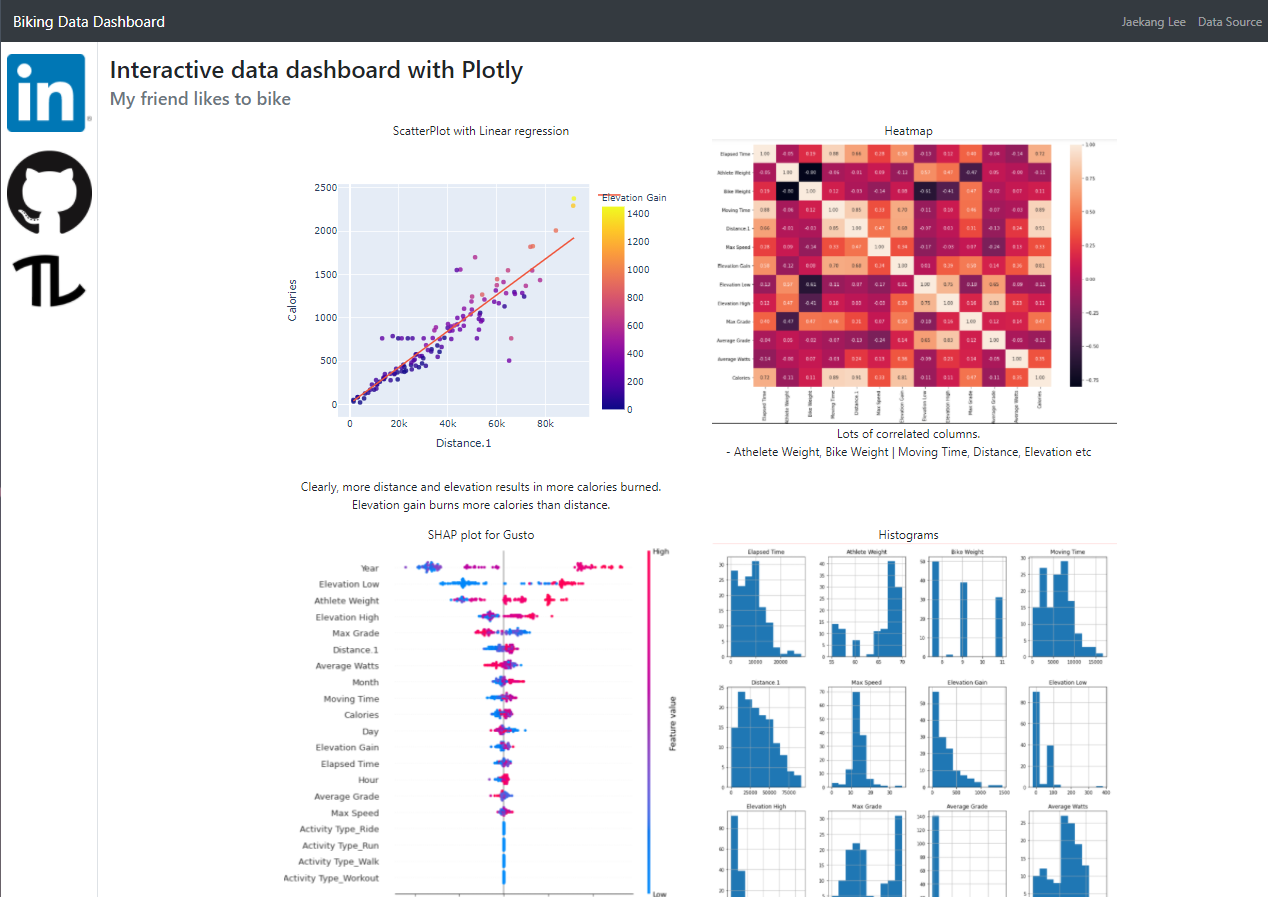

In [7]:
#hide_input
from IPython.display import Image
Image(filename = "images/dash.png")

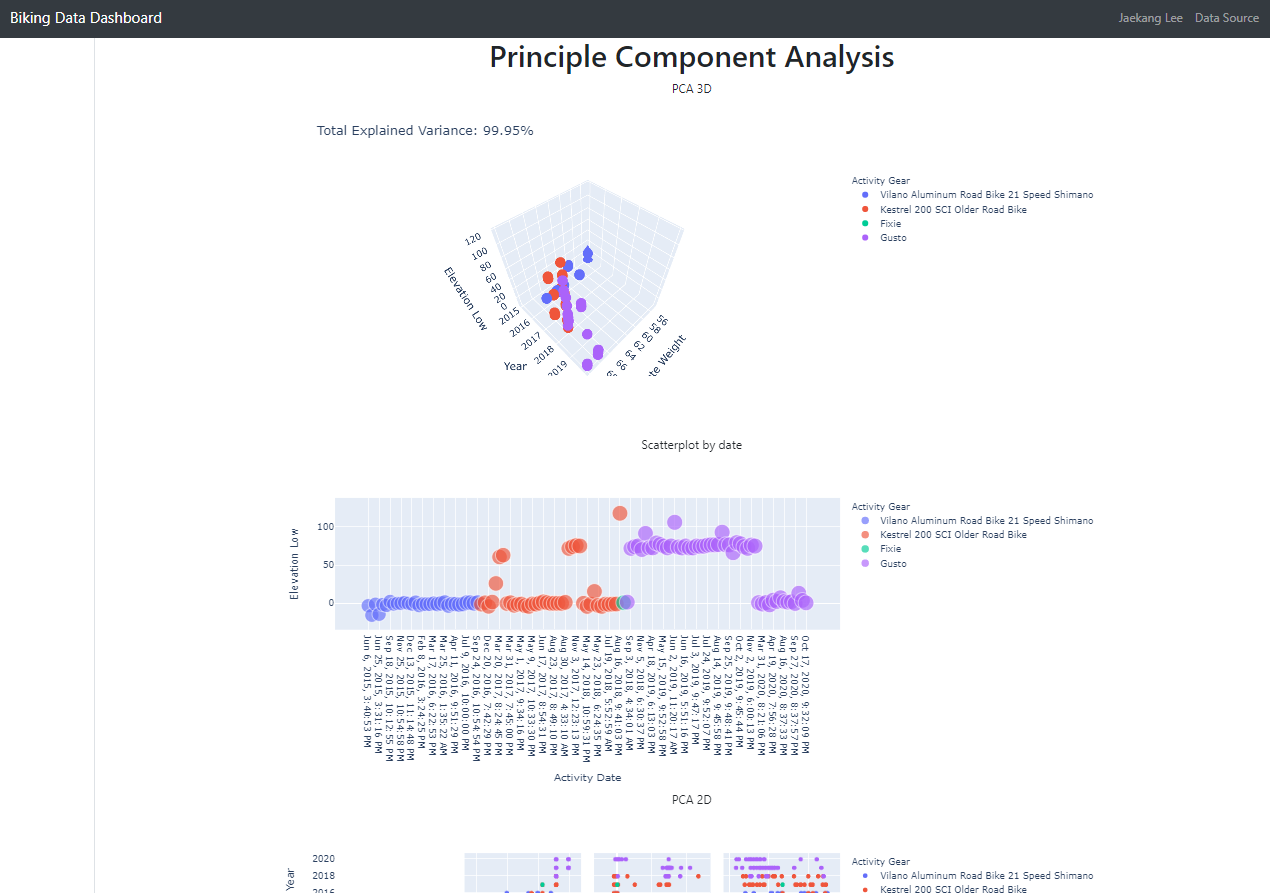

In [9]:
#hide_input
Image(filename = "images/dash2.png")

# [WEB-APP HERE](https://truman-bike.herokuapp.com/) 
Note that the web-app takes about a min to load!
# [GIT REPOSITORY HERE](https://github.com/leejaeka/Data-Science/tree/main/Biking)

This is just codes I used on the notebook to understand and clean the data. The data comes from my friend who likes to bike.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.utils import shuffle
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

In [84]:
df = pd.read_csv ('data/activities.csv')
orig = pd.read_csv('data/activities.csv')
df = shuffle(df)
print("number of rows: "+ str(len(df)))
df.head(1)

number of rows: 142


Activity ID              Activity Date   Activity Name Activity Type  \
47    723876967  Sep 24, 2016, 10:54:54 PM  Afternoon Ride          Ride   

   Activity Description  Elapsed Time  Distance  Relative Effort Commute  \
47                  NaN         12735     29.55              NaN   False   

                                 Activity Gear  ... Gear  \
47  Vilano Aluminum Road Bike 21 Speed Shimano  ...  NaN   

    Precipitation Probability  Precipitation Type  Cloud Cover  \
47                        NaN                 NaN          NaN   

    Weather Visibility  UV Index  Weather Ozone  \
47                 NaN       NaN            NaN   

    translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count  \
47                                                NaN                                                

    translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit  \
47                                                NaN                                                

    translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow  
47                                                NaN                                             

[1 rows x 77 columns]

In [85]:
# Find all columns that have at least 75% non null values
quater_nulls = list(df.columns[df.isnull().sum() <= 0.25*len(df)])
#quater_nulls

In [86]:
# Drop too many null columns
df = df[quater_nulls]
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Elapsed Time', 'Distance', 'Commute', 'Activity Gear', 'Filename',
       'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time',
       'Distance.1', 'Max Speed', 'Elevation Gain', 'Elevation Low',
       'Elevation High', 'Max Grade', 'Average Grade', 'Average Watts',
       'Calories', 'Commute.1', 'Bike'],
      dtype='object')

Going to remove discard = ['Activity Name', 'Activity ID', 'Commute', 'Filename', 'Commute.1','Distance', 'Elapsed Time.1', 'Bike'] <br>
Because not information or repetitive.

In [87]:
discard = ['Activity Name', 'Activity ID', 'Commute', 'Filename', 'Commute.1','Distance', 'Elapsed Time.1', 'Bike']
df = df.drop(discard, axis = 1)
df.head(1)

Activity Date Activity Type  Elapsed Time  \
47  Sep 24, 2016, 10:54:54 PM          Ride         12735   

                                 Activity Gear  Athlete Weight  Bike Weight  \
47  Vilano Aluminum Road Bike 21 Speed Shimano       63.502899         11.0   

    Moving Time    Distance.1  Max Speed  Elevation Gain  Elevation Low  \
47       7946.0  29549.900391       12.3         11.1737            1.2   

    Elevation High  Max Grade  Average Grade  Average Watts    Calories  
47            13.2  38.299999      -0.002369      53.709999  475.859314

In [80]:
df.describe()

Elapsed Time  Athlete Weight  Bike Weight   Moving Time    Distance.1  \
count    142.000000      128.000000   121.000000    142.000000    142.000000   
mean    8307.028169       65.011994     8.886777   5964.485915  34740.822462   
std     5371.122774        5.263799     1.400711   3368.764442  21521.125565   
min      204.000000       55.000000     7.500000    182.000000      0.000000   
25%     3414.500000       60.000000     7.500000   2949.000000  17527.250488   
50%     8070.500000       68.000000     9.000000   6047.500000  31560.699219   
75%    11301.000000       68.000000    11.000000   7957.250000  50011.325195   
max    28317.000000       70.000000    11.000000  16708.000000  91705.296875   

        Max Speed  Elevation Gain  Elevation Low  Elevation High   Max Grade  \
count  136.000000      137.000000     135.000000      135.000000  136.000000   
mean    13.735294      262.614366      26.635556       95.854814   27.179412   
std      3.903418      270.558590      47.756425      103.870238   15.398105   
min      0.000000        0.000000     -18.000000        6.900000    0.000000   
25%     11.800000       62.490898      -1.000000       21.850000   14.350000   
50%     13.700000      166.636993       0.900000      101.099998   22.300000   
75%     15.300000      358.088989      72.400002      125.799999   42.899999   
max     36.299999     1455.640015     382.299988     1092.099976   50.000000   

       Average Grade  Average Watts     Calories  
count     142.000000     126.000000   132.000000  
mean        0.271421     111.032301   764.836008  
std         3.187175      28.786978   489.682759  
min        -0.752807      49.716900    26.208254  
25%        -0.003579      91.731985   383.654442  
50%         0.000000     114.522282   673.522827  
75%         0.010629     130.717503  1066.323883  
max        37.947071     182.307999  2375.330322

<AxesSubplot:>

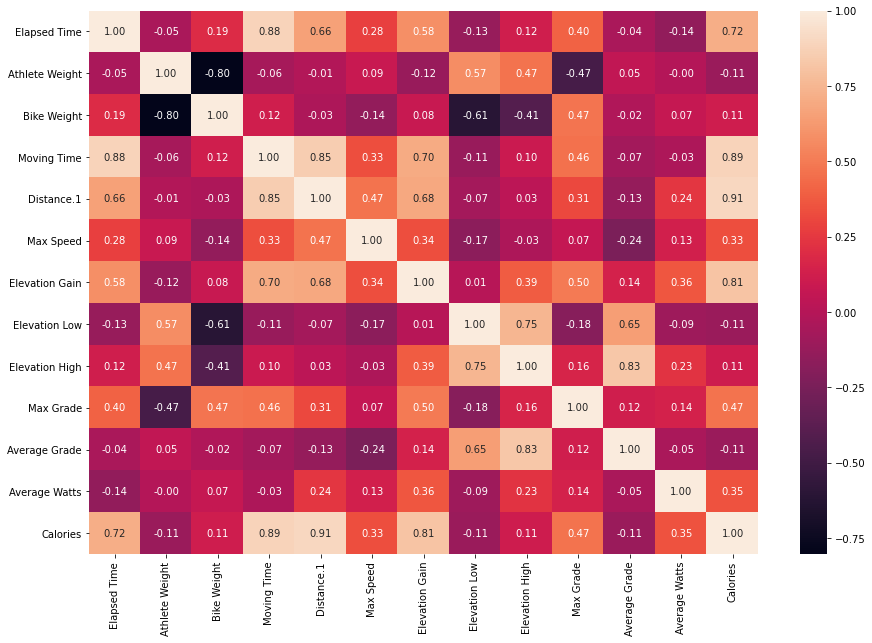

In [172]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax = plt.figure(figsize = (15,10)).gca())

Interesting Correlations:
- Elevation Low,High with Athelete Weight, bike weight
- Calories and Moving Time and Distance.1 and Elevation Gain
- Elevation High, Low and Average Grade
- Elevation Gain with Elapsed time, Moving Time, Distance

<ipython-input-141-c15b20fe6ff7>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = plt.figure(figsize = (15,20)).gca());


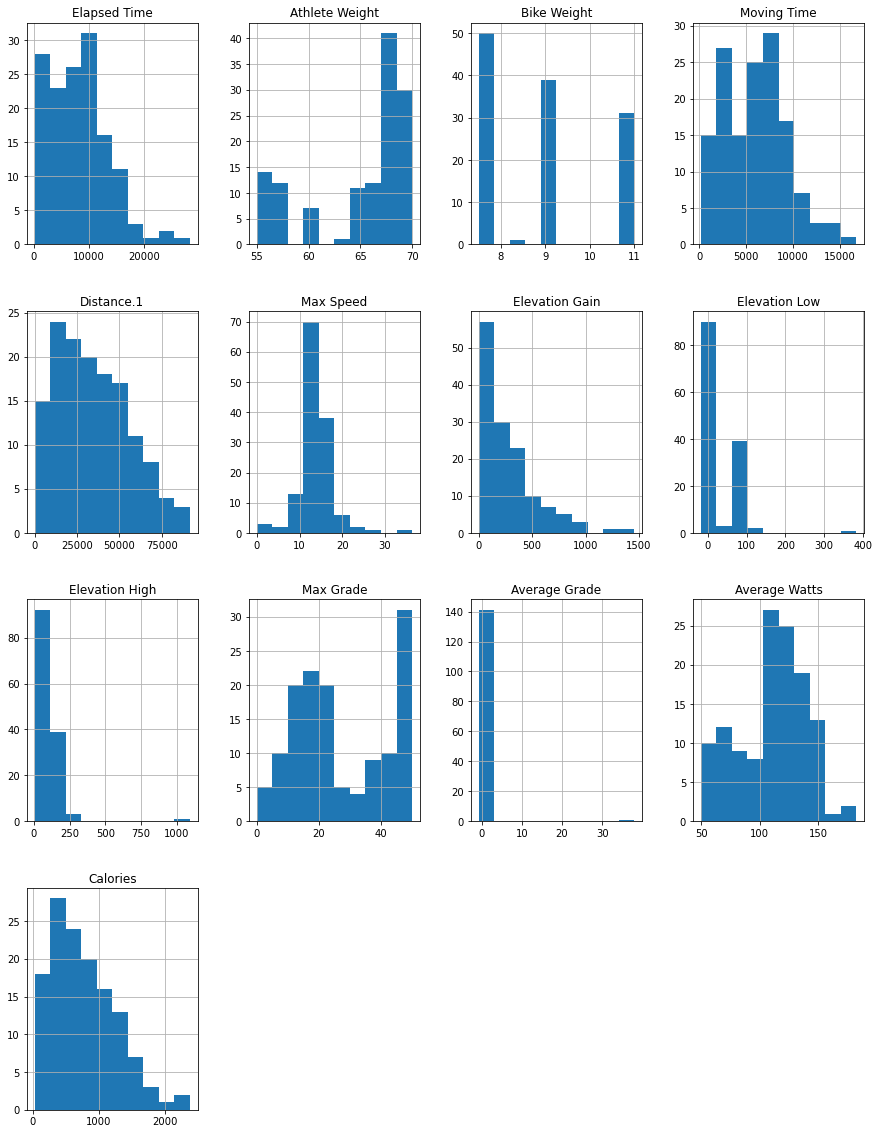

In [141]:
df.hist(ax = plt.figure(figsize = (15,20)).gca());

#### Categorical Columns

In [88]:
cat_df = df.select_dtypes(include=['object']) #choose categorical columns
cat_df

Activity Date Activity Type  \
47  Sep 24, 2016, 10:54:54 PM          Ride   
8   May 23, 2015, 10:26:06 PM          Ride   
94   Sep 29, 2018, 4:19:38 PM          Ride   
55   Mar 22, 2017, 3:44:50 PM          Ride   
40   Apr 16, 2016, 5:57:42 PM          Ride   
..                        ...           ...   
30   Mar 16, 2016, 6:25:36 PM          Ride   
66  Jun 23, 2017, 11:25:10 PM          Ride   
62   May 9, 2017, 10:33:30 PM          Ride   
91   Aug 22, 2018, 9:34:35 PM          Ride   
35   Mar 23, 2016, 5:35:32 AM           Run   

                                 Activity Gear  
47  Vilano Aluminum Road Bike 21 Speed Shimano  
8                                          NaN  
94                                       Gusto  
55             Kestrel 200 SCI Older Road Bike  
40  Vilano Aluminum Road Bike 21 Speed Shimano  
..                                         ...  
30  Vilano Aluminum Road Bike 21 Speed Shimano  
66             Kestrel 200 SCI Older Road Bike  
62             Kestrel 200 SCI Older Road Bike  
91                                       Gusto  
35                                         NaN  

[142 rows x 3 columns]

Lets clean these up ðŸ§¹

In [89]:
# Fix Date column into Year, Month, Day, Hour
time = df['Activity Date'].astype('datetime64[ns]')
yr,mon,d,h = [],[],[],[]
for i in time:
    yr.append(i.year)
    mon.append(i.month)
    d.append(i.day)
    h.append(i.hour)
len(yr)
time.head(4)
df['Year'] = yr
df['Month'] = mon
df['Day'] = d
df['Hour'] = h

In [90]:
df = df.drop(['Activity Date'], axis=1) # Drop original Date value
df.head(3)    

Activity Type  Elapsed Time                               Activity Gear  \
47          Ride         12735  Vilano Aluminum Road Bike 21 Speed Shimano   
8           Ride         11734                                         NaN   
94          Ride          4696                                       Gusto   

    Athlete Weight  Bike Weight  Moving Time    Distance.1  Max Speed  \
47       63.502899         11.0       7946.0  29549.900391       12.3   
8        56.699001          NaN      10057.0  59956.300781       14.6   
94       68.000000          7.5       4127.0  27227.500000       14.0   

    Elevation Gain  Elevation Low  Elevation High  Max Grade  Average Grade  \
47       11.173700            1.2       13.200000  38.299999      -0.002369   
8       825.666992           -2.4      101.099998  46.500000       0.079558   
94      158.414581           75.0      158.199997  11.000000       0.235424   

    Average Watts     Calories  Year  Month  Day  Hour  
47      53.709999   475.859314  2016      9   24    22  
8      130.302002  1461.148682  2015      5   23    22  
94     109.483162   580.913513  2018      9   29    16

In [176]:
print("Unique Activity Gear values: " + str(df['Activity Gear'].unique()))
print("Unique Activity Gear values: " + str(df['Activity Type'].unique()))

Unique Activity Gear values: ['Gusto' 'Kestrel 200 SCI Older Road Bike' nan
 'Vilano Aluminum Road Bike 21 Speed Shimano' 'Fixie']
Unique Activity Gear values: ['Ride' 'Hike' 'Run' 'Workout' 'Walk']


In [91]:
# Function to create dummy variables
def create_dummy_df(df, cat_cols, dummy_na=False):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool whether you want to dummy NA values or not
    
    OUTPUT:
    df - new dataframe with following characteristics:
        1. contains all columns that were not specified as categorical
        2. removes all the original columns in cat_cols
        3. dummy columns for each of the categorical columns in cat_cols
        4. use a prefix of the column name with an underscore (_) for separating
        5. if dummy_na is True - it also contains dummy columns for NaN values
    '''
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df = create_dummy_df(df, ['Activity Type'], dummy_na = True)
df.head(3)

Elapsed Time                               Activity Gear  Athlete Weight  \
47         12735  Vilano Aluminum Road Bike 21 Speed Shimano       63.502899   
8          11734                                         NaN       56.699001   
94          4696                                       Gusto       68.000000   

    Bike Weight  Moving Time    Distance.1  Max Speed  Elevation Gain  \
47         11.0       7946.0  29549.900391       12.3       11.173700   
8           NaN      10057.0  59956.300781       14.6      825.666992   
94          7.5       4127.0  27227.500000       14.0      158.414581   

    Elevation Low  Elevation High  ...     Calories  Year  Month  Day  Hour  \
47            1.2       13.200000  ...   475.859314  2016      9   24    22   
8            -2.4      101.099998  ...  1461.148682  2015      5   23    22   
94           75.0      158.199997  ...   580.913513  2018      9   29    16   

    Activity Type_Ride  Activity Type_Run  Activity Type_Walk  \
47                   1                  0                   0   
8                    1                  0                   0   
94                   1                  0                   0   

    Activity Type_Workout  Activity Type_nan  
47                      0                  0  
8                       0                  0  
94                      0                  0  

[3 rows x 23 columns]

#### Null Values

In [32]:
no_nulls = list(df.columns[df.isnull().sum() != 0])
no_nulls

['Activity Gear',
 'Athlete Weight',
 'Bike Weight',
 'Max Speed',
 'Elevation Gain',
 'Elevation Low',
 'Elevation High',
 'Max Grade',
 'Average Watts',
 'Calories']

Based on their histogram, it seem like a good idea to <br>
- Imputation on median: [Athlete Weight, Bike Weight, Elevation Low, Elevation High] <br>
- Imputation on mean: [Elevation Gain, Average Watts, Calories, Max Speed, Max Grade]


In [33]:
# Imputation functions
fill_mean = lambda col: col.fillna(col.mean()) # function for imputating mean
fill_median = lambda col: col.fillna(col.median()) # function for imputating median

# impuation on mean
fill_df = df[['Elevation Gain', 'Average Watts', 'Calories', 'Max Speed', 'Max Grade']].apply(fill_mean, axis=0) 
fill_df = pd.concat([fill_df, df.drop(['Elevation Gain', 'Average Watts', 'Calories', 'Max Speed', 'Max Grade'], axis=1)], axis=1)
# imputation on median
fill_df_med = df[['Athlete Weight', 'Bike Weight', 'Elevation Low', 'Elevation High']].apply(fill_median, axis=0)
filled_df = pd.concat([fill_df.drop(['Athlete Weight', 'Bike Weight', 'Elevation Low', 'Elevation High'], axis = 1), fill_df_med], axis=1)
# Alternative solution to null values by dropping all
dropped_df = df.dropna()
filled_df.head(2)

Elevation Gain  Average Watts     Calories  Max Speed  Max Grade  \
8       825.666992     130.302002  1461.148682  14.600000  46.500000   
28       41.823601     128.156006  1058.558350  19.200001  24.700001   

    Elapsed Time                               Activity Gear  Moving Time  \
8          11734                                         NaN      10057.0   
28          8448  Vilano Aluminum Road Bike 21 Speed Shimano       7408.0   

      Distance.1  Average Grade  ...  Hour  Activity Type_Ride  \
8   59956.300781       0.079558  ...    22                   1   
28  53329.601562      -0.015939  ...    15                   1   

    Activity Type_Run  Activity Type_Walk  Activity Type_Workout  \
8                   0                   0                      0   
28                  0                   0                      0   

    Activity Type_nan  Athlete Weight  Bike Weight  Elevation Low  \
8                   0       56.699001          9.0           -2.4   
28                  0       60.000000         11.0           -1.0   

    Elevation High  
8       101.099998  
28       42.200001  

[2 rows x 23 columns]

In [31]:
dropped_df.head(2)

Elapsed Time                               Activity Gear  Athlete Weight  \
101         11327                                       Gusto       68.000000   
44           5335  Vilano Aluminum Road Bike 21 Speed Shimano       67.131599   

     Bike Weight  Moving Time    Distance.1  Max Speed  Elevation Gain  \
101          7.5       7993.0  54209.500000       11.5      240.664948   
44          11.0       5038.0  38688.300781       11.8       24.196800   

     Elevation Low  Elevation High  ...    Calories  Year  Month  Day  Hour  \
101      74.800003      113.900002  ...  975.611206  2019      5   15    21   
44        0.000000       13.900000  ...  770.871704  2016      8   29    17   

     Activity Type_Ride  Activity Type_Run  Activity Type_Walk  \
101                   1                  0                   0   
44                    1                  0                   0   

     Activity Type_Workout  Activity Type_nan  
101                      0                  0  
44                       0                  0  

[2 rows x 23 columns]

In [34]:
filled_df = filled_df.dropna() #Note: can change this to na -> no bike (on foot)

In [35]:
no_nulls = list(filled_df.columns[filled_df.isnull().sum() != 0])
no_nulls_2 = list(dropped_df.columns[dropped_df.isnull().sum() != 0])
assert(no_nulls_2 == [])
assert(no_nulls == [])

#### Linear Regression

In [152]:
# Split data PREDICT DISTANCE
y = filled_df['Distance.1']
X = filled_df.drop(['Distance.1'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

lm_model = LinearRegression(normalize=True)

In [153]:
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [154]:
# R-Squared Score
test_pred = lm_model.predict(X_test)
train_pred = lm_model.predict(X_train)
r2_test = r2_score(y_test, test_pred)
r2_train = r2_score(y_train, train_pred)
print("test r2: "+str(r2_test))
print("train r2: "+str(r2_train))

test r2: 0.6550060428615112
train r2: 0.9398003894033616


In [33]:
# Split data PREDICT BIKE
bike_df = filled_df.drop(['Bike Weight'], axis=1) # Drop bike weight so it doesn't cheat
y = bike_df['Activity Gear']
X = bike_df.drop(['Activity Gear'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

#### Random Forests 

In [16]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=2000, max_leaf_nodes=32, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=32, n_estimators=2000, n_jobs=-1)

In [17]:
y_test_pred = rnd_clf.predict(X_test)
test_acc = np.sum(y_test_pred == y_test)/len(y_test)
print("test accuracy: "+str(test_acc))

test accuracy: 0.8421052631578947


In [25]:
from sklearn.preprocessing import LabelEncoder

#https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi

labels = [
    "Fixie",
    "Kestrel 200 SCI Older Road Bike",
    "Vilano Aluminum Road Bike 21 Speed Shimano",
    "Gusto",
]
le = LabelEncoder()
z = le.fit_transform(labels)
encoding_scheme = dict(zip(z, labels))
print(encoding_scheme)

{0: 'Fixie', 2: 'Kestrel 200 SCI Older Road Bike', 3: 'Vilano Aluminum Road Bike 21 Speed Shimano', 1: 'Gusto'}


In [37]:
sum(y == 'Kestrel 200 SCI Older Road Bike')

39

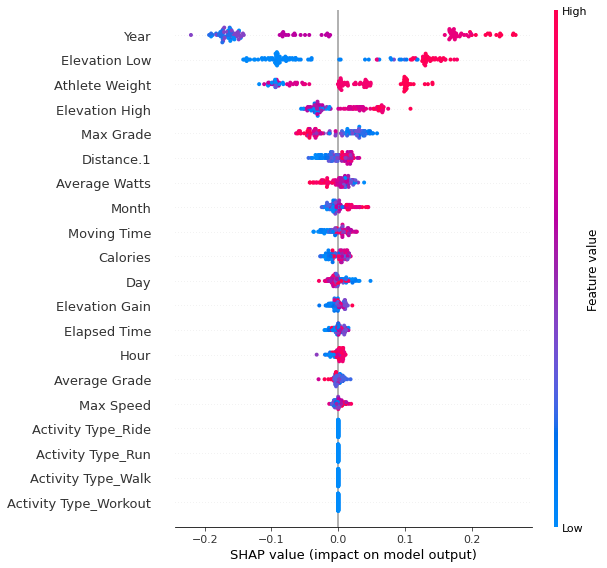

In [21]:
import shap

explainer = shap.TreeExplainer(rnd_clf)
shap_values = explainer.shap_values(X)
# SHAP plot for Gusto
shap.summary_plot(shap_values[1], X)

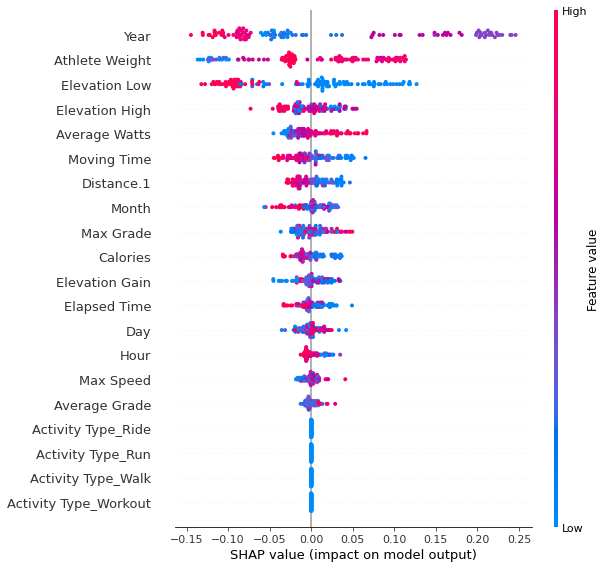

In [27]:
# SHAP plot for Kestrel 200 SCI Older Road Bike
shap.summary_plot(shap_values[2], X)

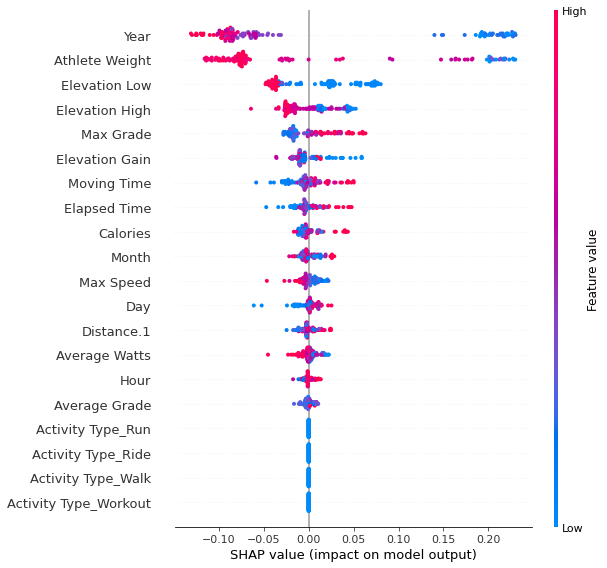

In [28]:
# SHAP plot for Vilano Aluminum Road Bike 21 Speed Shimano
shap.summary_plot(shap_values[3], X)

#### Make it harder for computer to guess

In [203]:
# Let us make it even harder for the computer to guess
bike_df = filled_df.drop(['Bike Weight', 'Year', 'Athlete Weight'], axis=1) # Drop bike weight so it doesn't cheat
y = bike_df['Activity Gear']
X = bike_df.drop(['Activity Gear'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [204]:
rnd_clf = RandomForestClassifier(n_estimators=2000, max_leaf_nodes=32, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=32, n_estimators=2000, n_jobs=-1)

In [205]:
y_test_pred = rnd_clf.predict(X_test)
test_acc = np.sum(y_test_pred == y_test)/len(y_test)
print("test accuracy: "+str(test_acc))

test accuracy: 0.5263157894736842


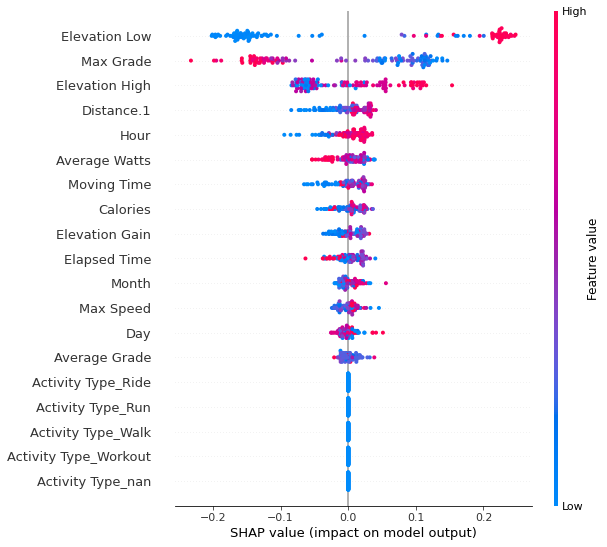

In [210]:
explainer = shap.TreeExplainer(rnd_clf)
shap_values = explainer.shap_values(X)
# Gustov
shap.summary_plot(shap_values[1], X)

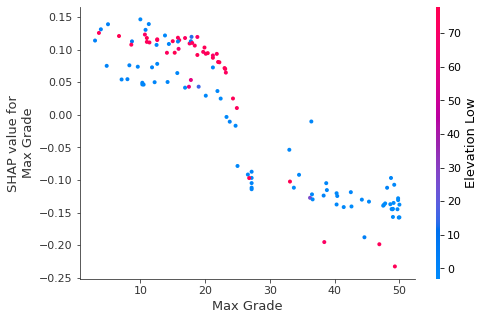

In [211]:
shap.dependence_plot('Max Grade', shap_values[1], X, interaction_index='Elevation Low')

What the heck makes Elevation Low a good guessing tool? Maybe my friend liked more mountains with certain bikes

In [93]:
#hide-output
# Plotly tests
import plotly.express as px

df_i = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df_i,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()